In [8]:
import os
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import sklearn as sk
import os
import time
import datetime
import math

In [97]:
path = '/home/catherinej/Downloads'
file = os.path.join(path, 'IrmaMudThicknessComparisons - Original Data.csv')
mud = pd.read_csv(file)
# mud.head()
# mud.info()
# mud.describe()

In [98]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return (km * 1000)

In [99]:
site_lat = mud['Lat']
site_lon = mud['Lon']
ocean_lat = mud['water_lat']
ocean_lon = mud['water_lon']

In [100]:
distance = []
for i in range(len(site_lat)):
    dist = haversine(site_lon[i], site_lat[i], ocean_lon[i], ocean_lat[i])
    distance.append(dist)
dist = pd.DataFrame({'Distance': distance})
mud = mud.join(dist) 


In [106]:
from mud_machine_learning import clean_dataframe as cdf
mud1 = mud
train, test = cdf(mud, mud1)
train.info()
train['Thickness at Date 1 (cm)'] = train['Thickness at Date 1 (cm)'].apply(pd.to_numeric)
train['Thickness at Date 3 (cm)'] = train['Thickness at Date 3 (cm)'].apply(pd.to_numeric)
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 126
Data columns (total 12 columns):
Region                      83 non-null object
Site                        83 non-null object
Station                     83 non-null object
Thickness at Date 1 (cm)    83 non-null object
Thickness at Date 2 (cm)    83 non-null float64
Thickness at Date 3 (cm)    81 non-null object
Lat                         83 non-null float64
Lon                         83 non-null float64
water_lat                   83 non-null float64
water_lon                   83 non-null float64
Unnamed: 13                 1 non-null object
Distance                    83 non-null float64
dtypes: float64(6), object(6)
memory usage: 8.4+ KB


,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 13,Distance
0,TTI,CCB,CC1 S1,0.00,0.00,0.00,26.02238,-81.73427,26.021769,-81.734467,NaN,70.689926
4,TTI,CCB,CC2 S1,0.00,0.00,0.00,26.02202,-81.73415,26.021769,-81.734467,NaN,42.190802
8,TTI,CCB,CC3 S1,0.00,0.00,0.00,26.02143,-81.73410,26.021769,-81.734467,NaN,52.557232
12,TTI,BW2,BW2 S1,9.00,4.00,6.00,25.92489,-81.60935,25.924941,-81.609406,NaN,7.965115
13,TTI,BW2,BW2 S2,11.00,6.50,2.00,25.92488,-81.60933,25.924941,-81.609406,NaN,10.180534
14,TTI,BW2,BW2 S3,2.00,6.50,2.50,25.92490,-81.60927,25.924941,-81.609406,NaN,14.335448
15,TTI,BW2,BW2 S4,2.00,3.00,3.50,25.92485,-81.60921,25.924941,-81.609406,NaN,22.044900
16,TTI,BW2,BW2 S5,5.00,3.00,3.00,25.92484,-81.60919,25.924941,-81.609406,NaN,24.330893
17,TTI,BW2,BW2 S6,2.00,4.00,2.00,25.92481,-81.60925,25.924941,-81.609406,NaN,21.330664
18,TTI,BW2,BW2 S7,2.00,1.00,2.00,25.92482,-81.60931,25.924941,-81.609406,NaN,16.518246


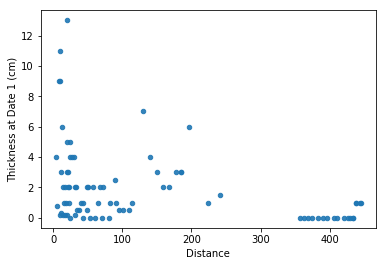

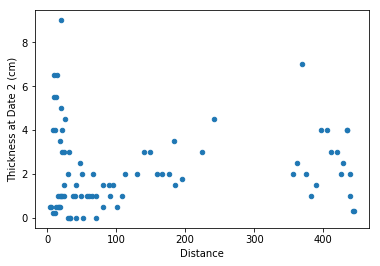

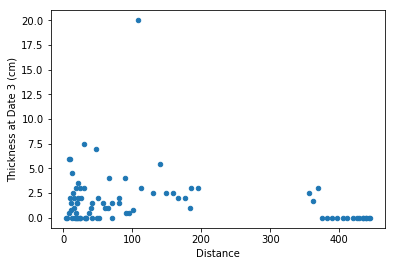

In [107]:
train.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', alpha=1)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 3 (cm)', alpha=1)
# plt.legend()

/home/catherinej/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


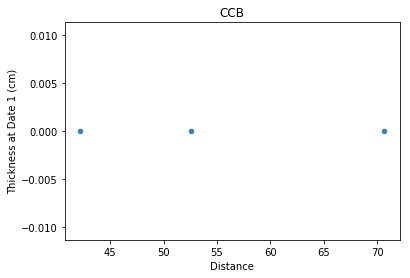

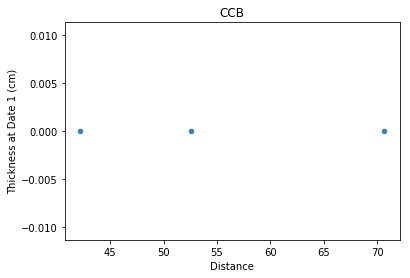

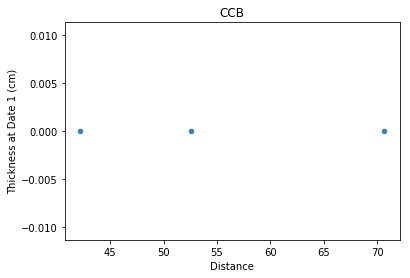

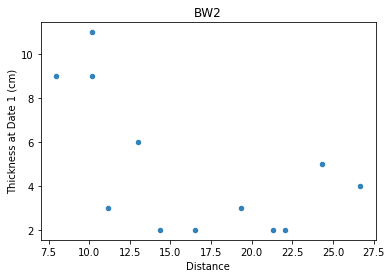

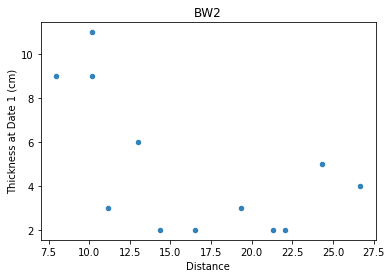

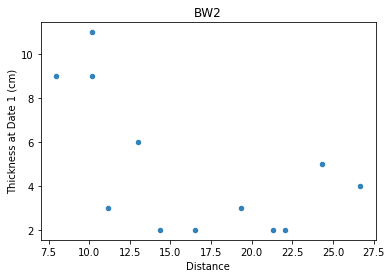

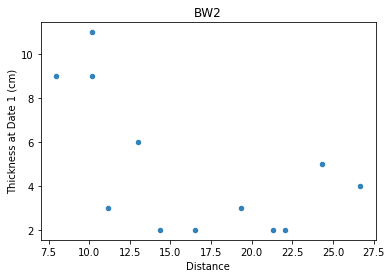

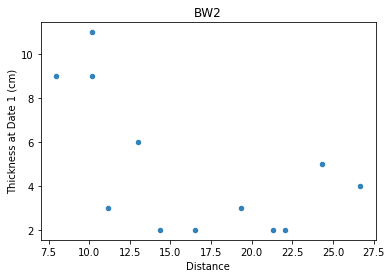

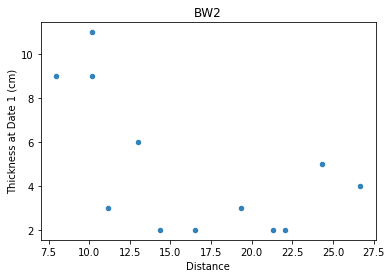

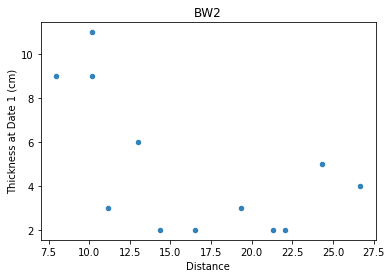

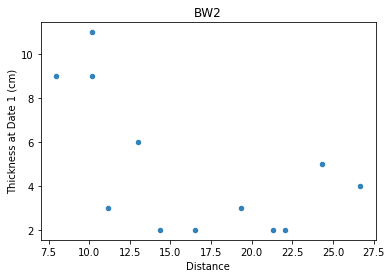

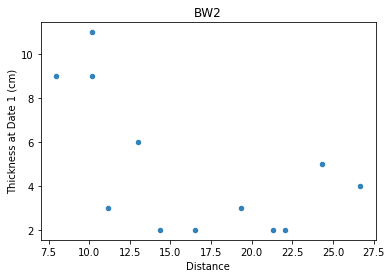

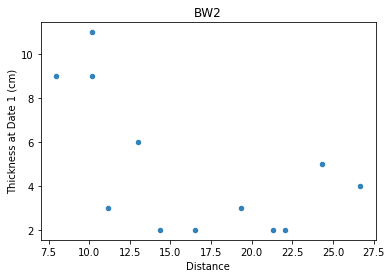

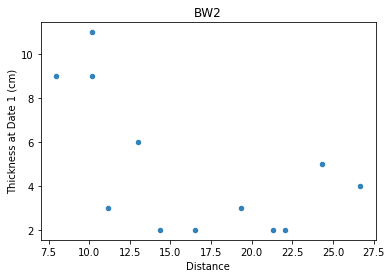

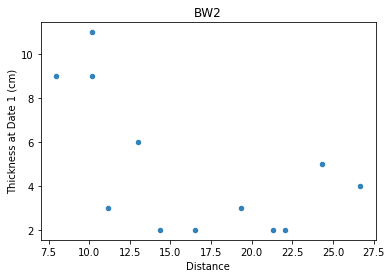

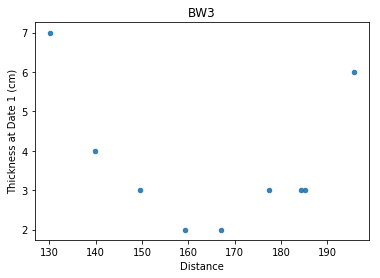

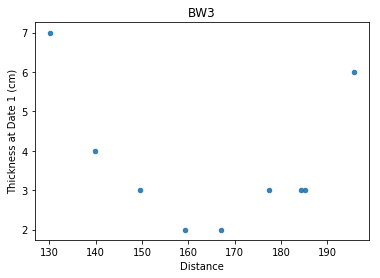

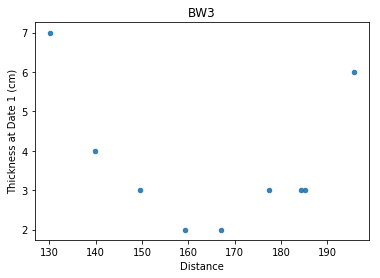

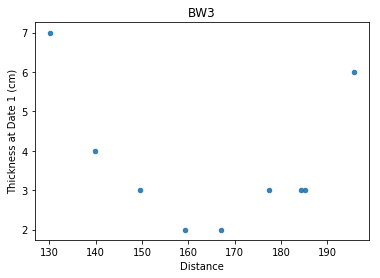

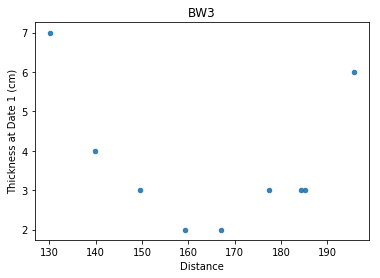

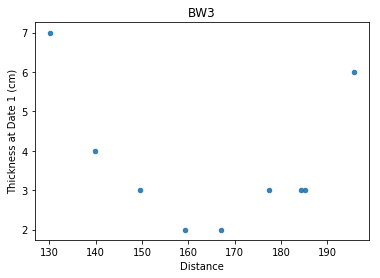

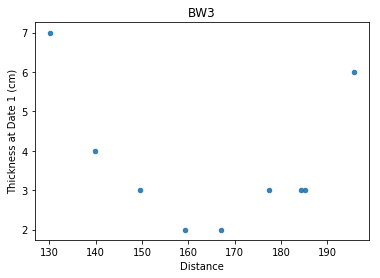

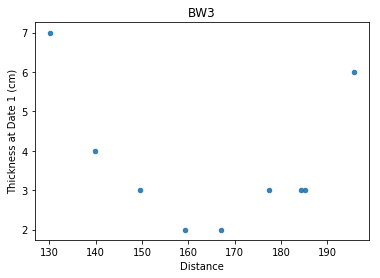

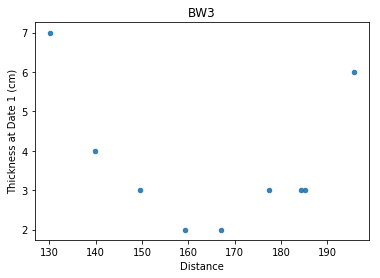

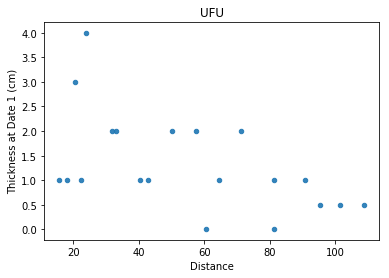

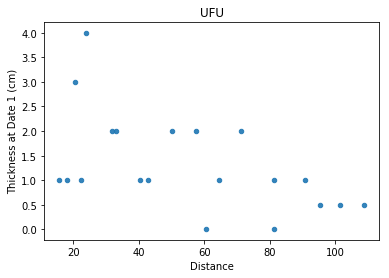

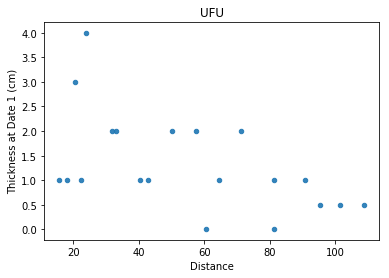

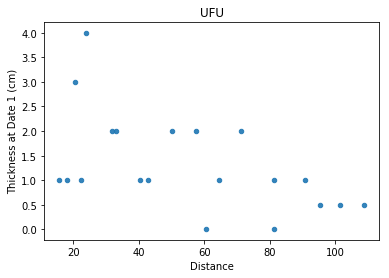

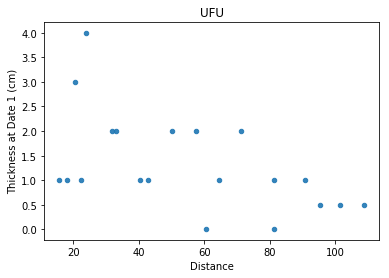

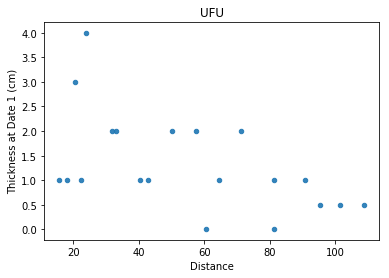

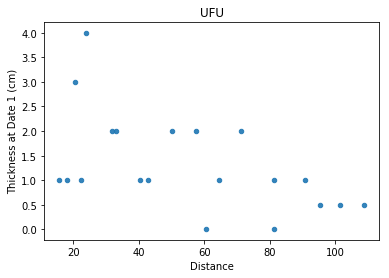

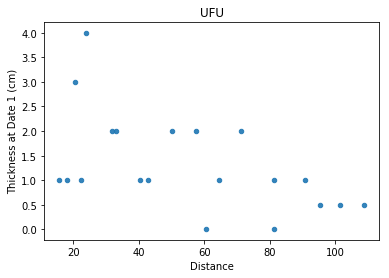

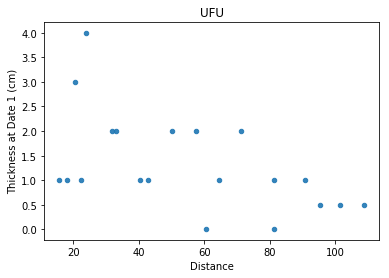

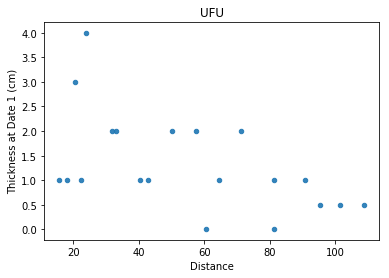

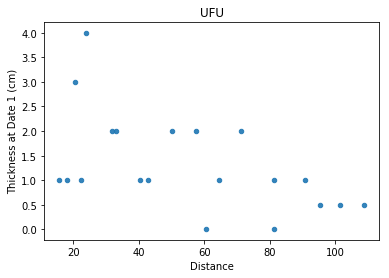

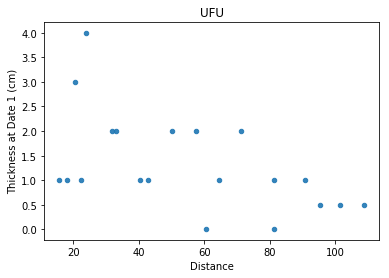

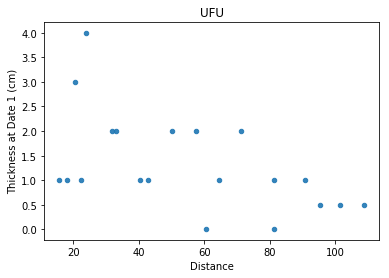

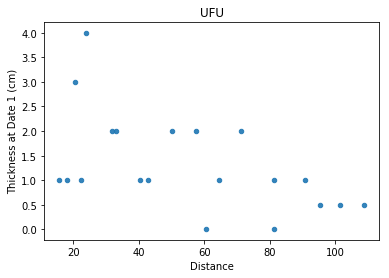

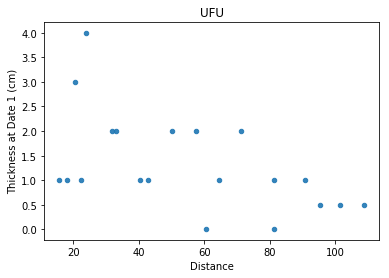

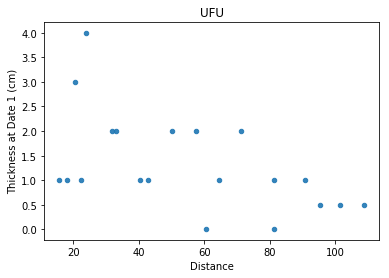

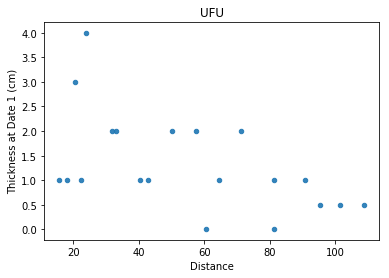

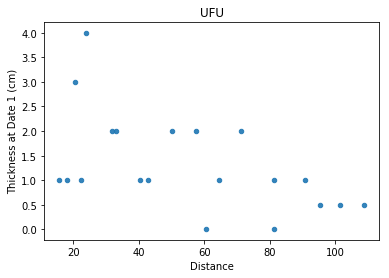

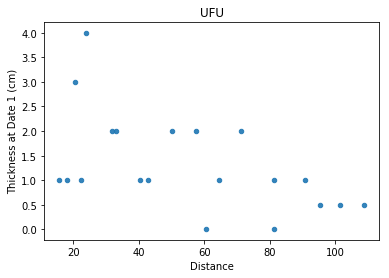

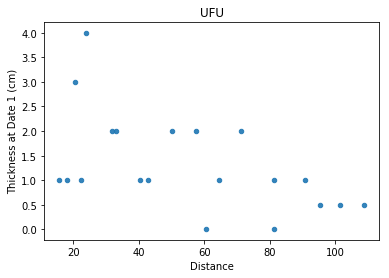

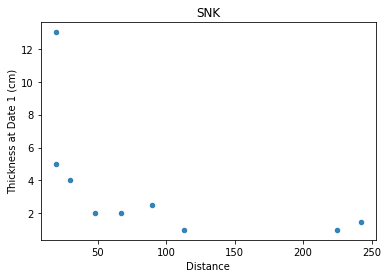

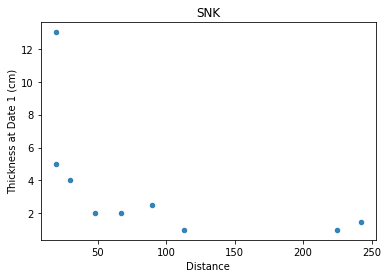

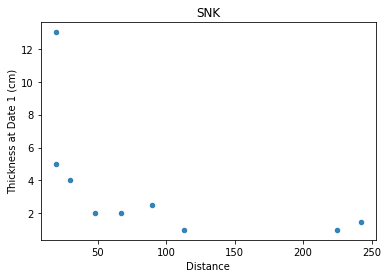

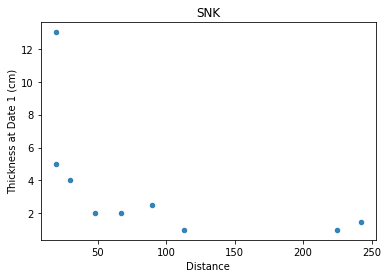

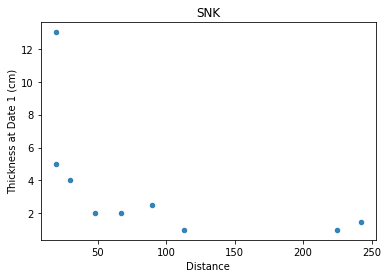

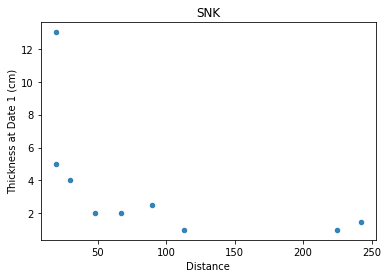

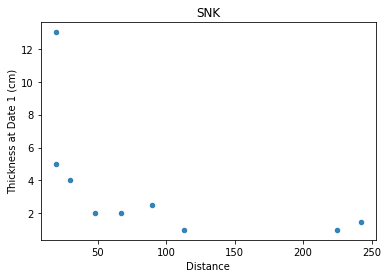

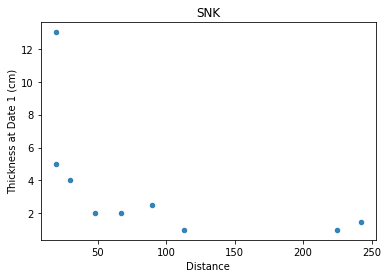

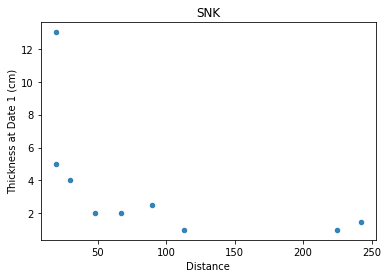

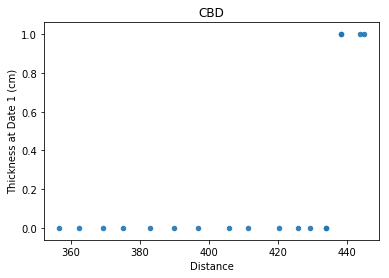

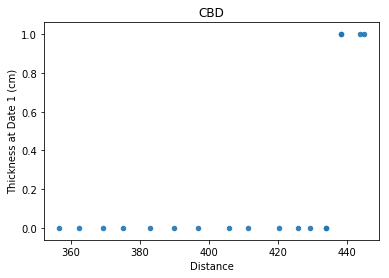

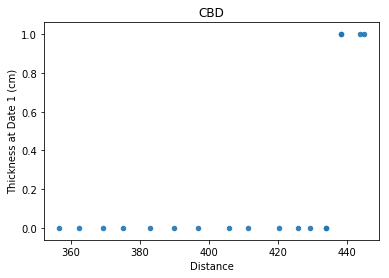

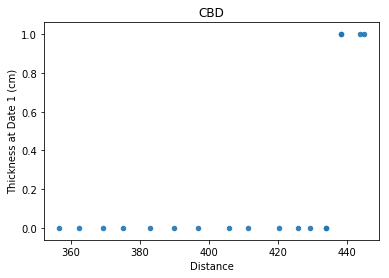

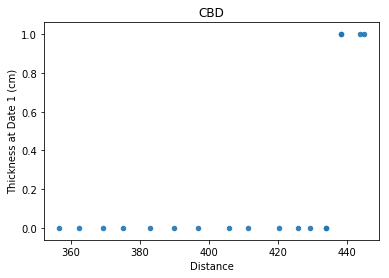

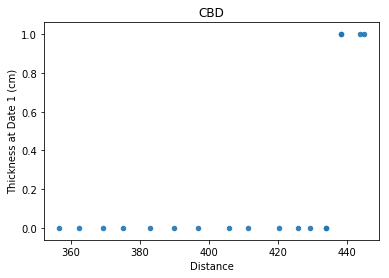

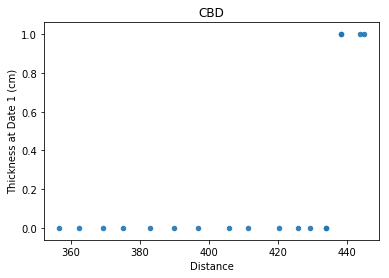

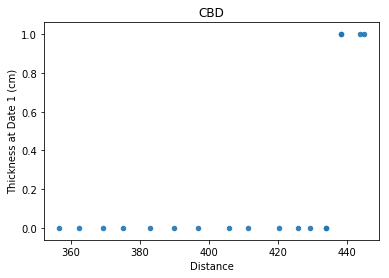

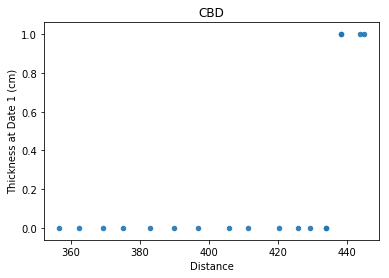

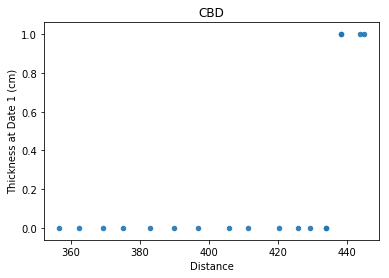

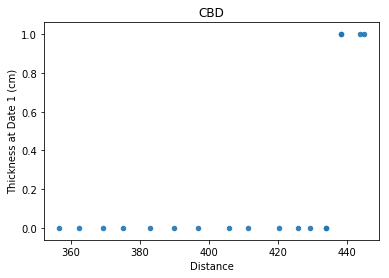

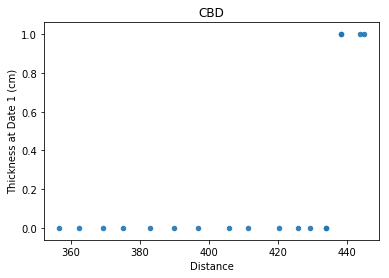

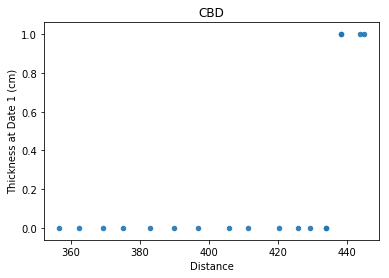

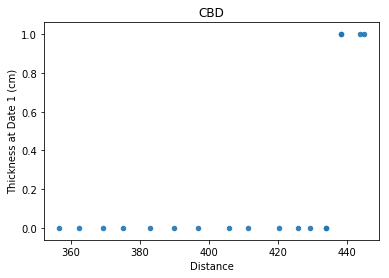

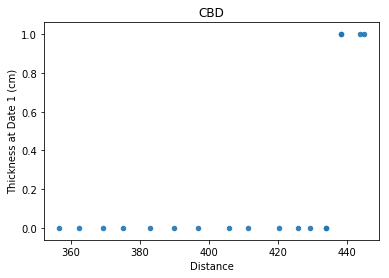

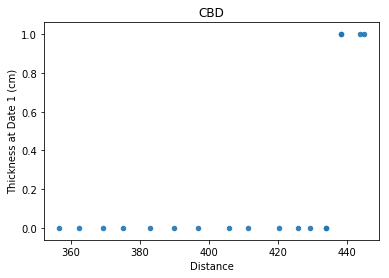

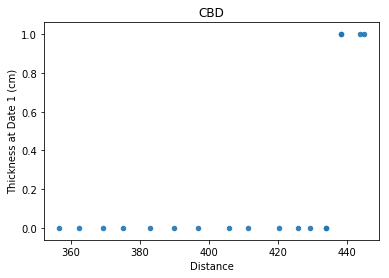

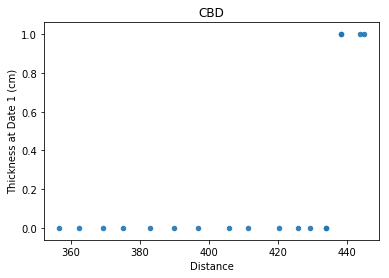

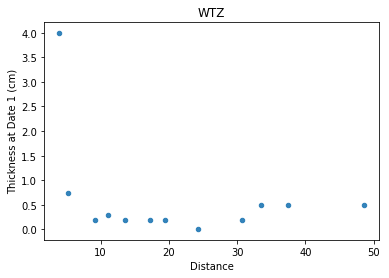

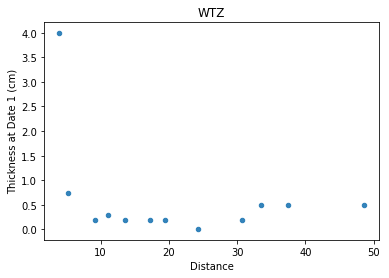

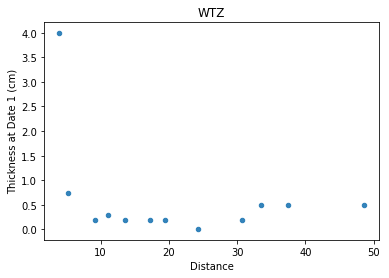

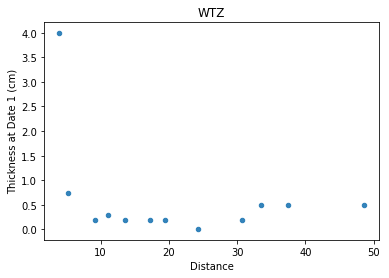

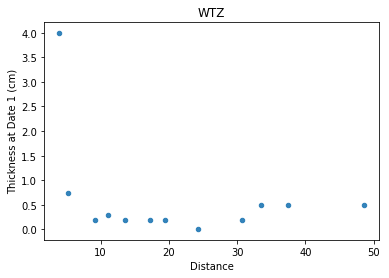

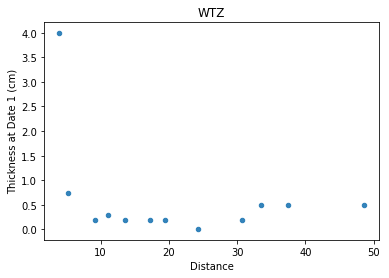

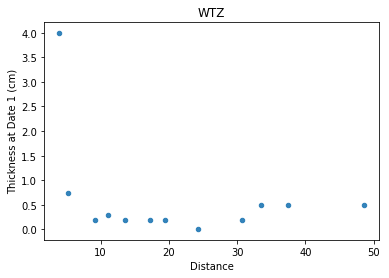

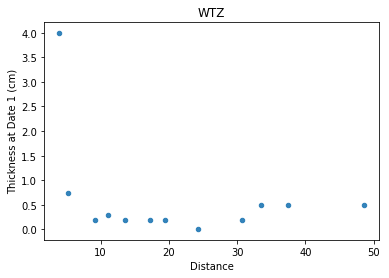

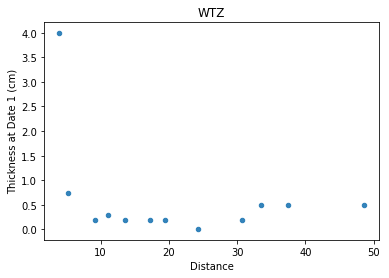

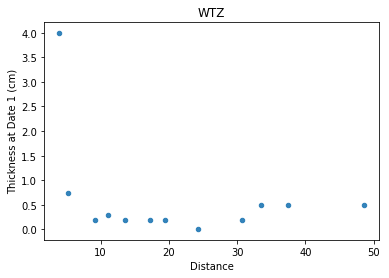

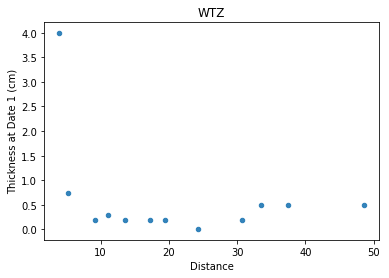

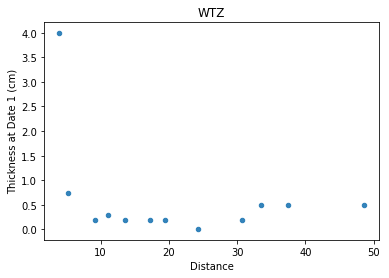

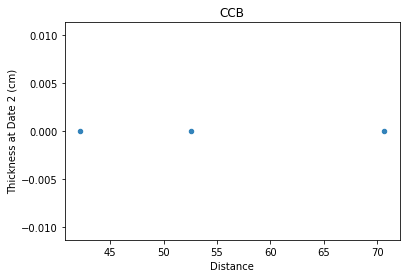

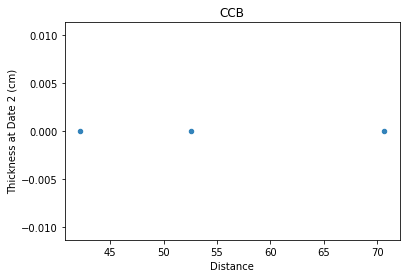

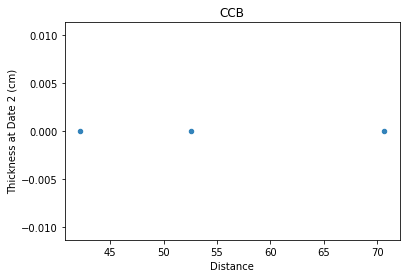

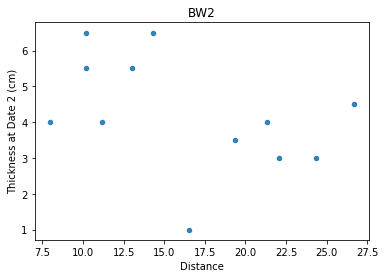

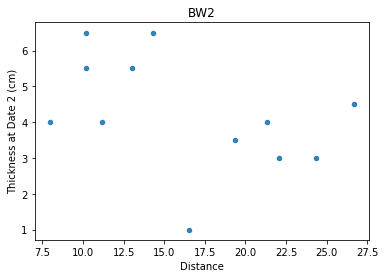

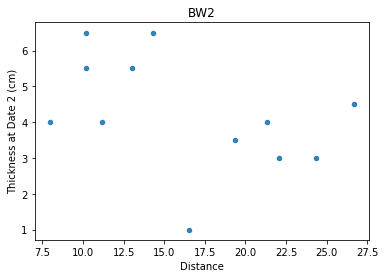

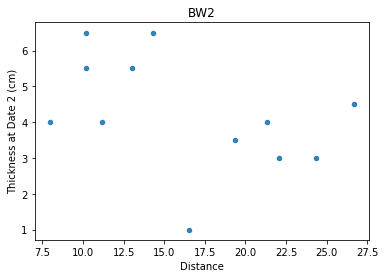

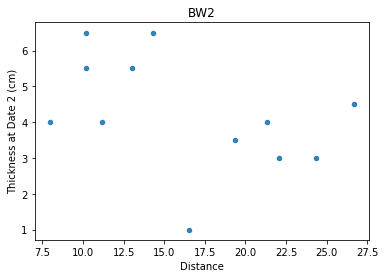

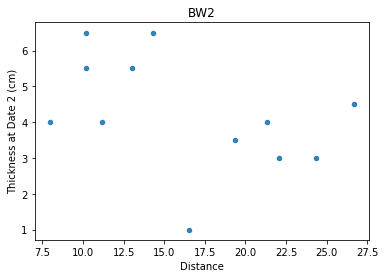

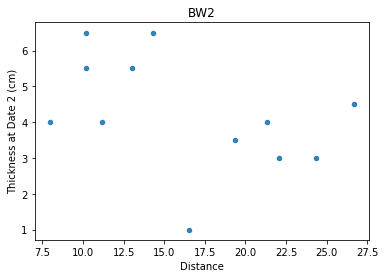

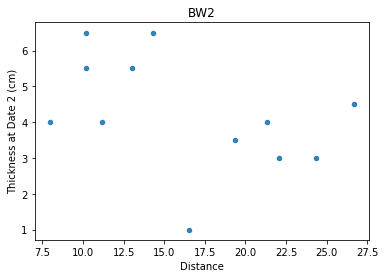

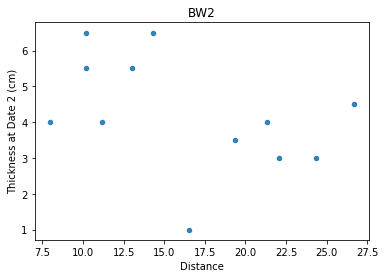

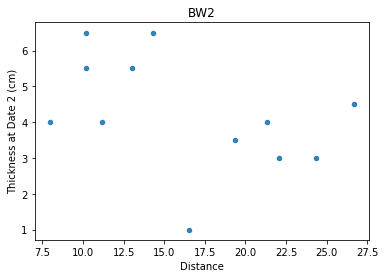

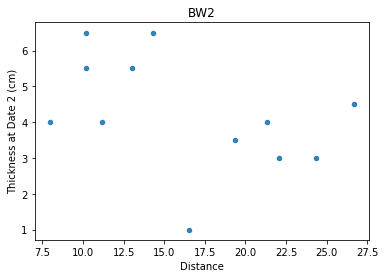

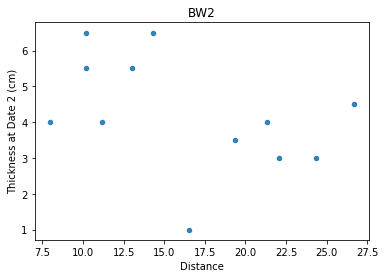

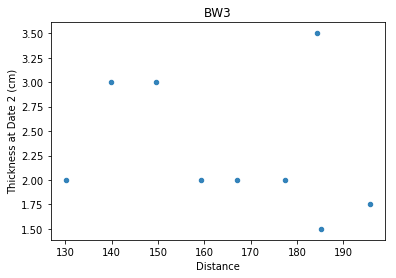

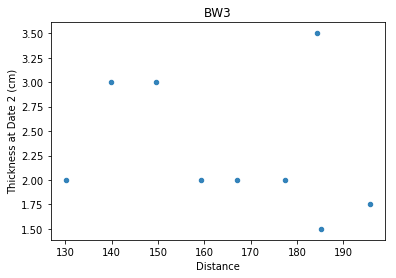

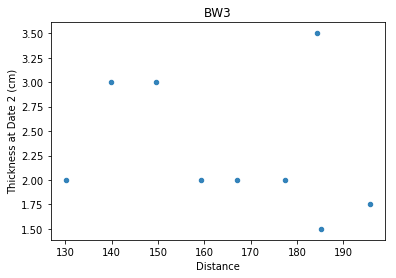

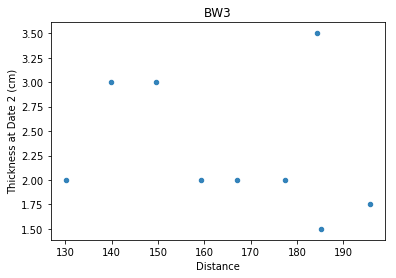

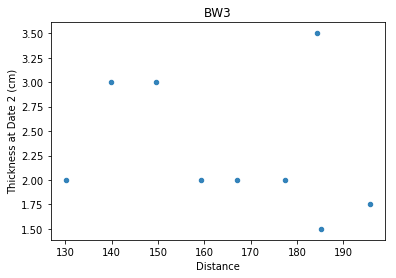

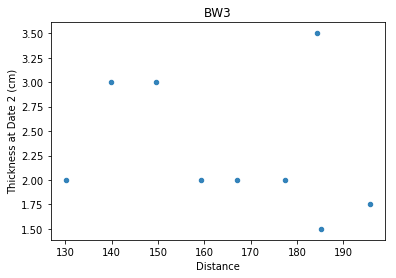

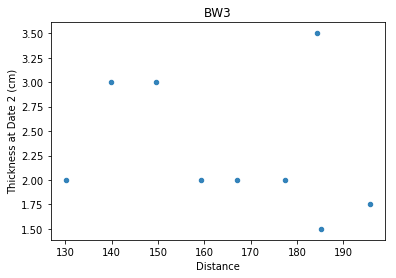

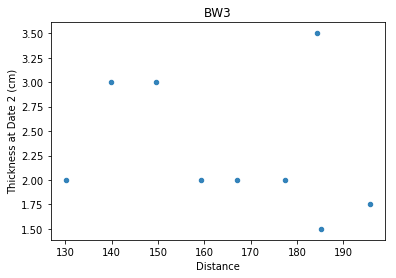

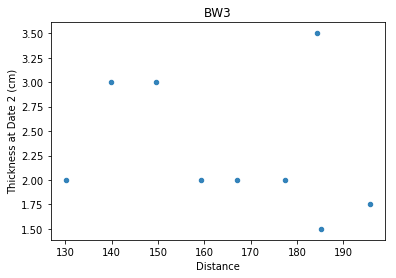

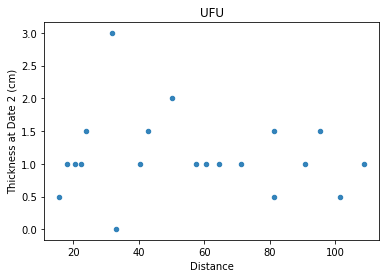

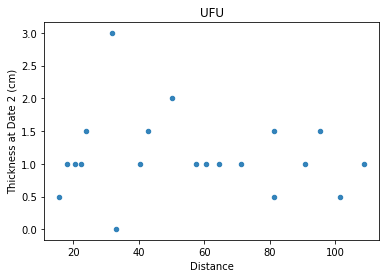

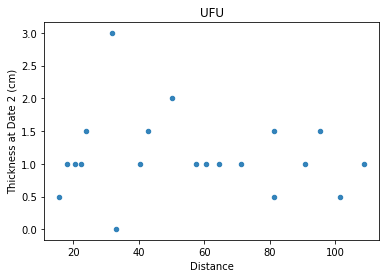

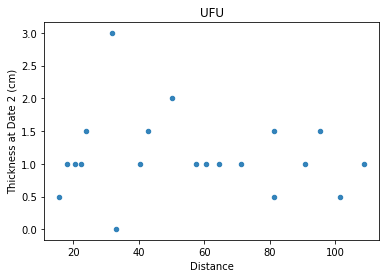

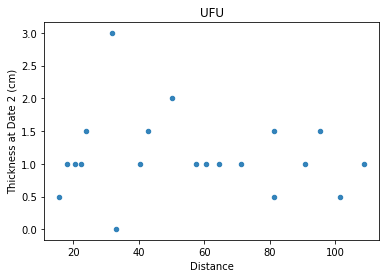

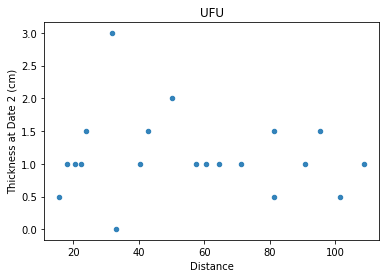

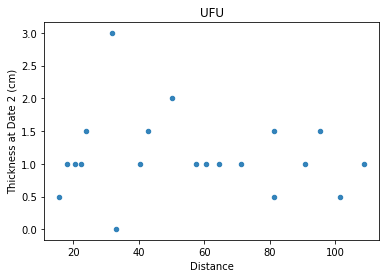

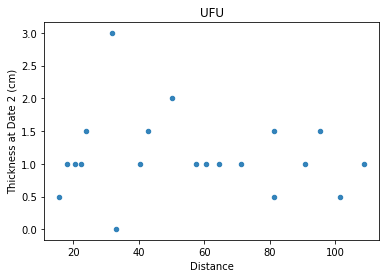

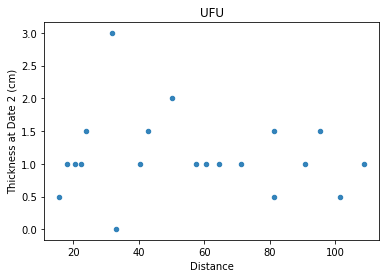

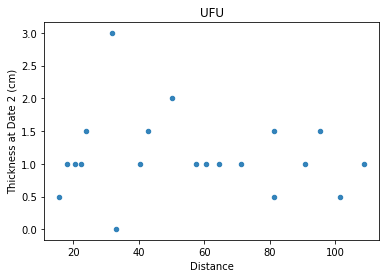

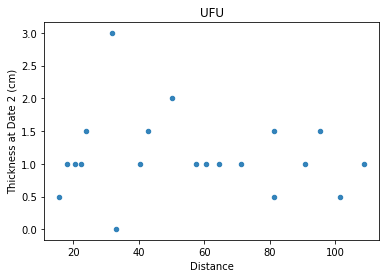

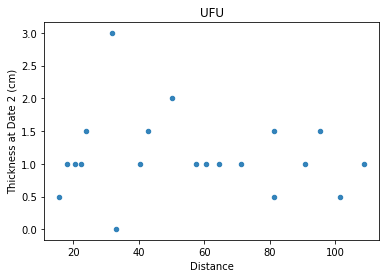

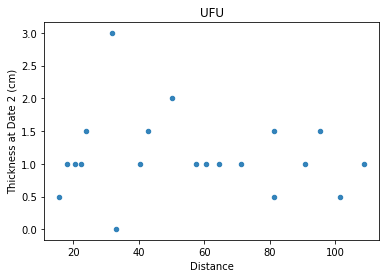

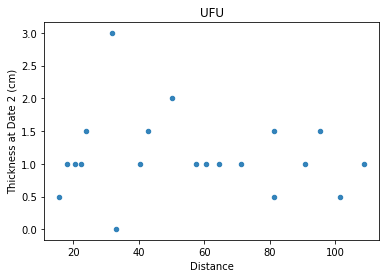

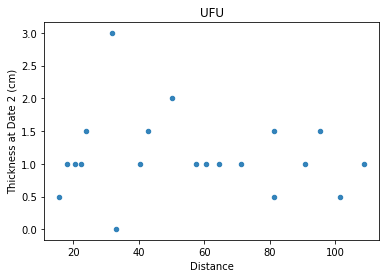

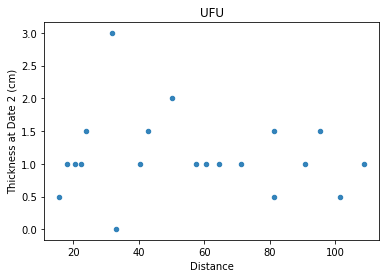

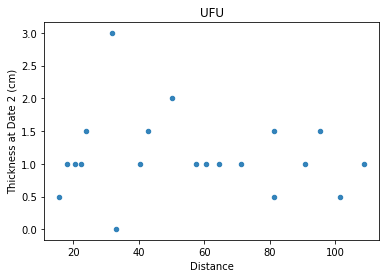

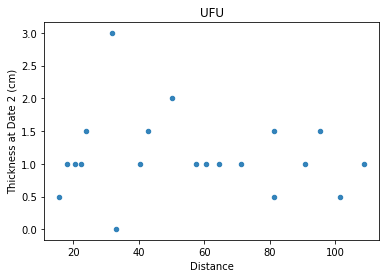

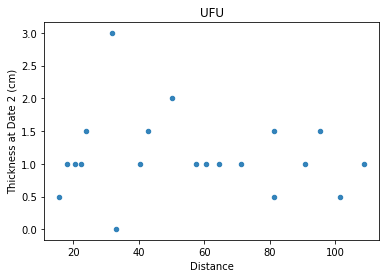

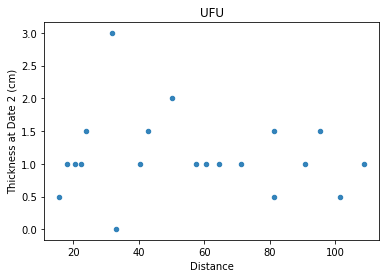

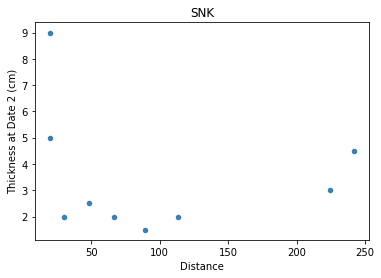

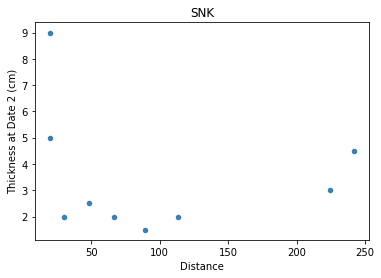

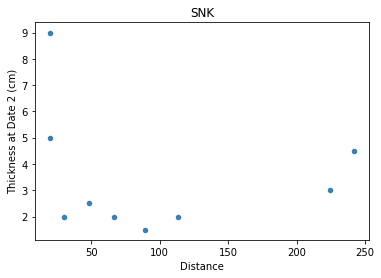

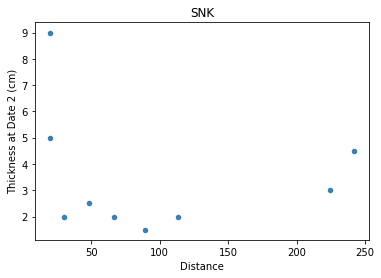

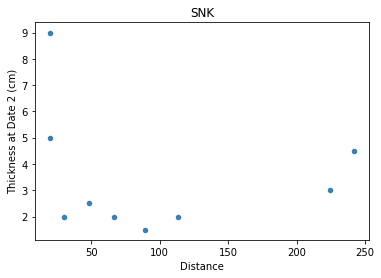

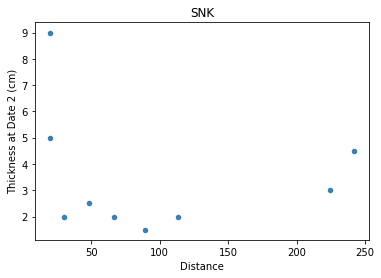

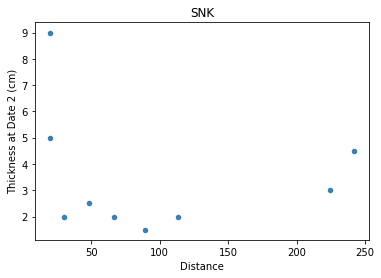

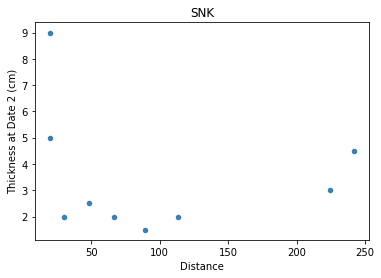

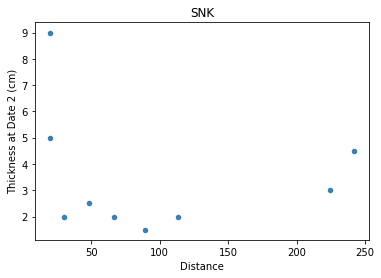

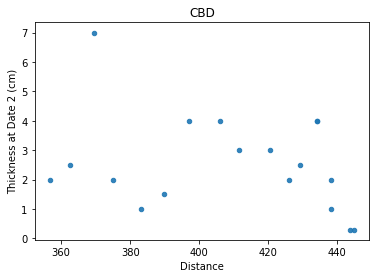

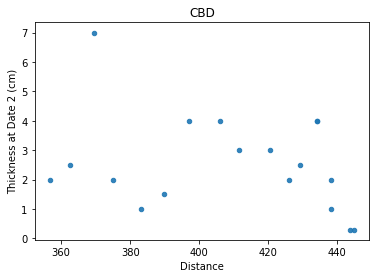

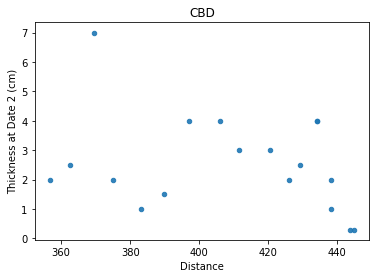

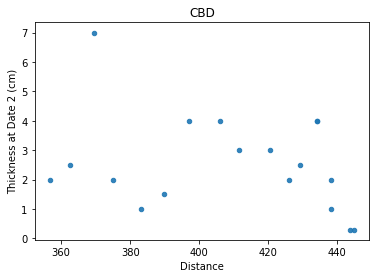

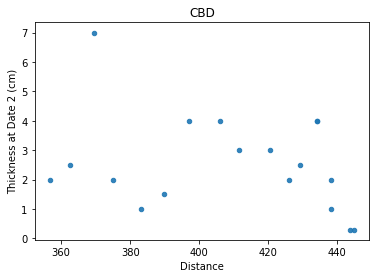

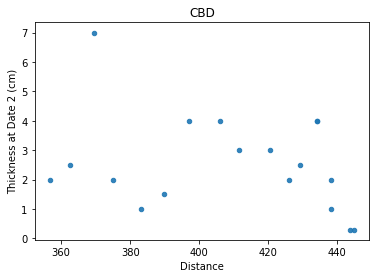

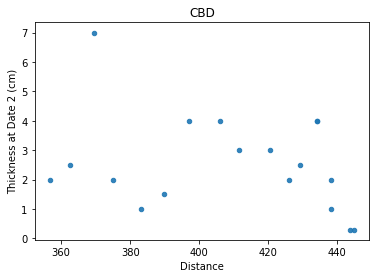

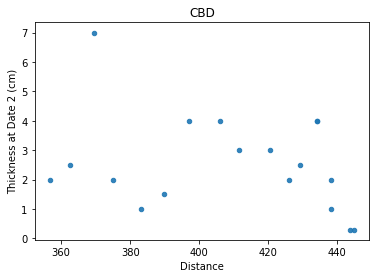

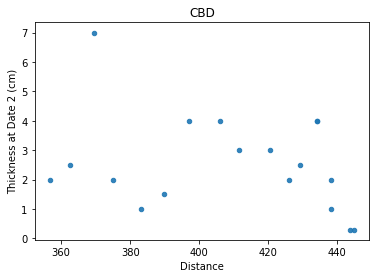

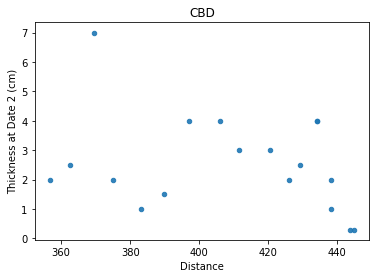

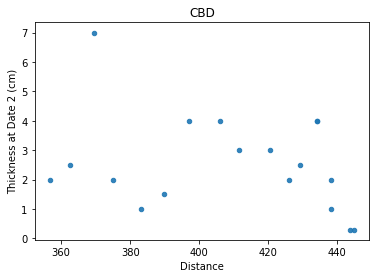

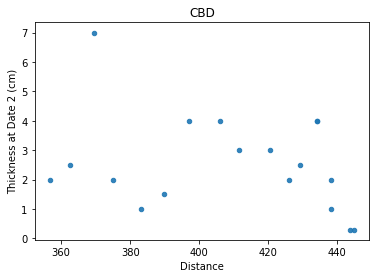

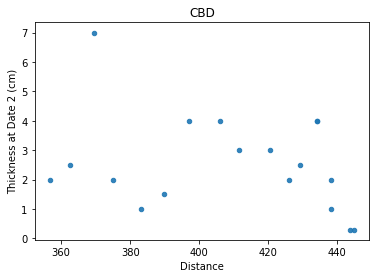

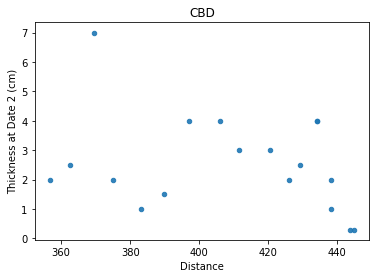

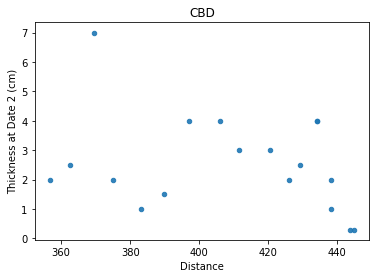

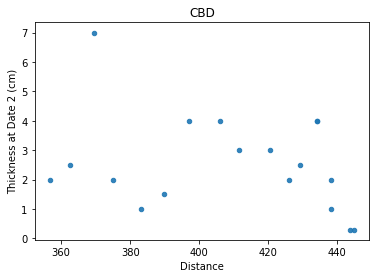

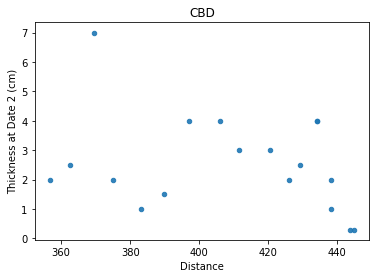

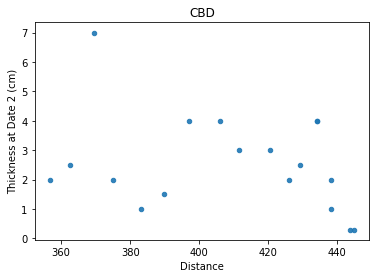

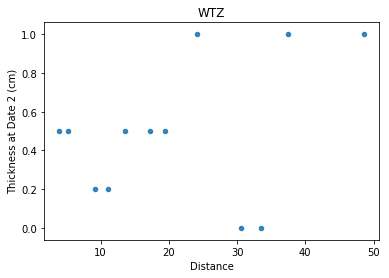

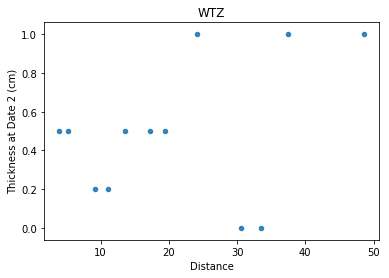

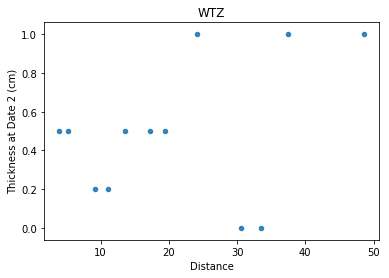

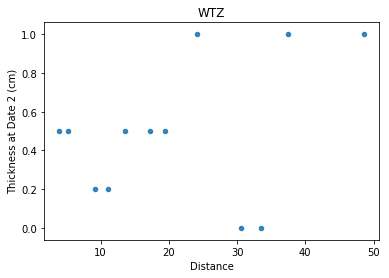

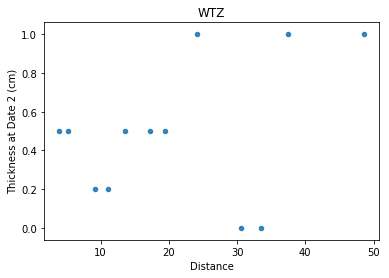

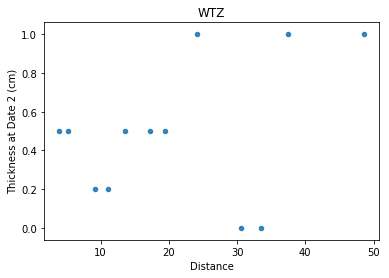

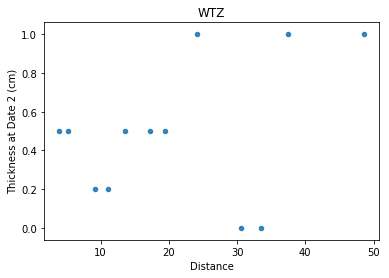

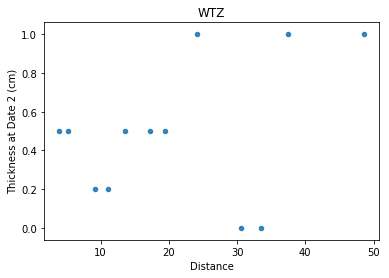

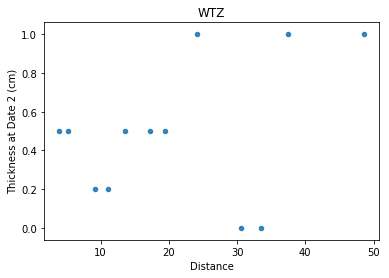

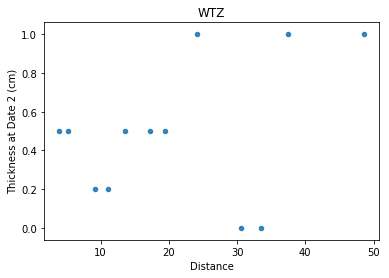

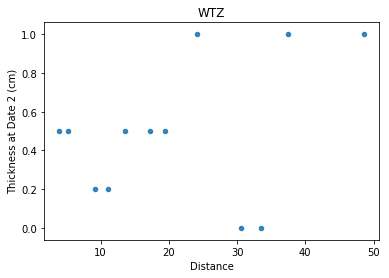

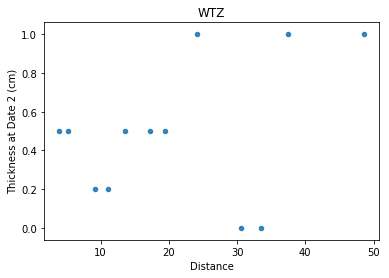

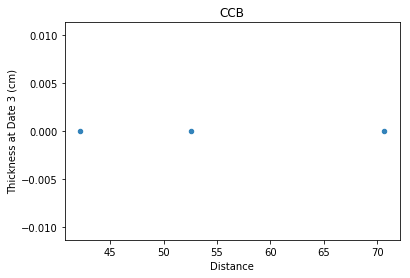

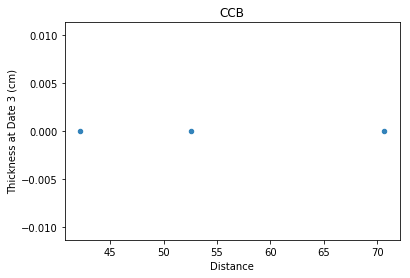

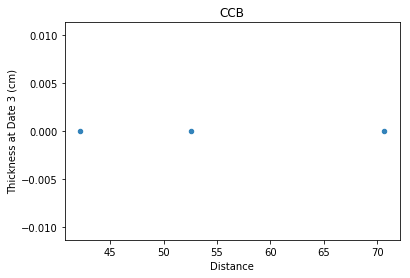

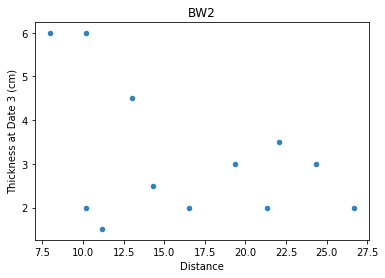

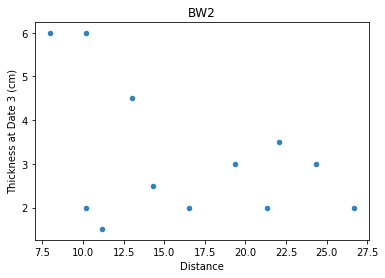

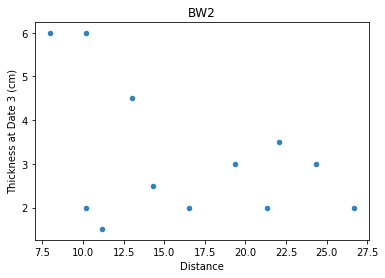

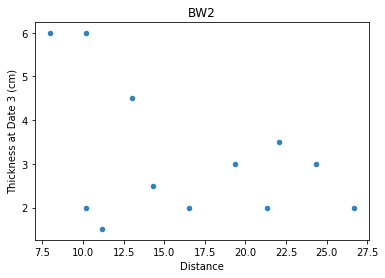

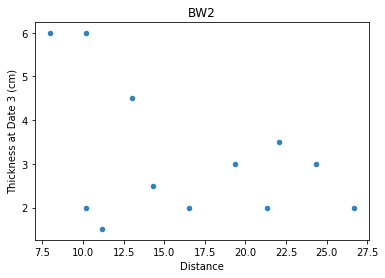

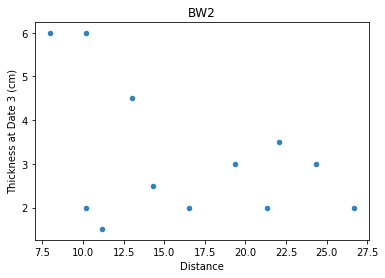

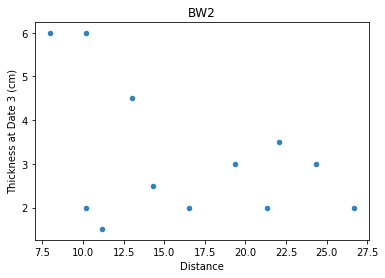

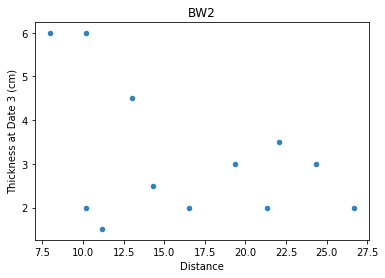

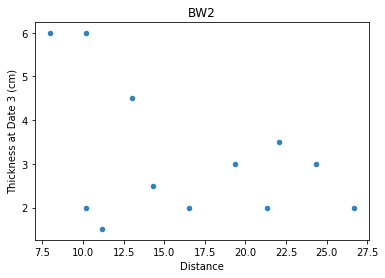

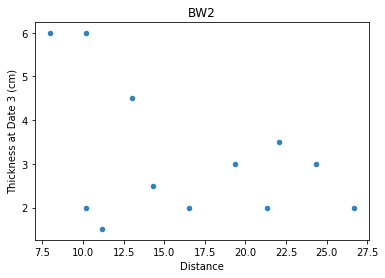

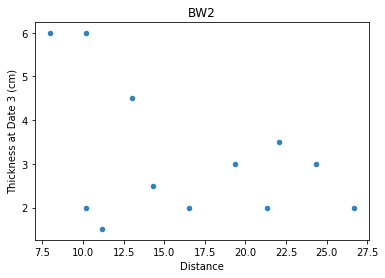

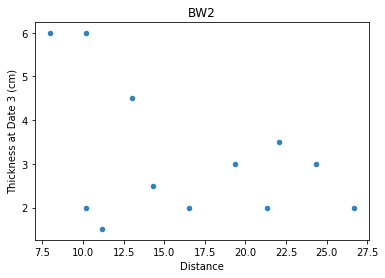

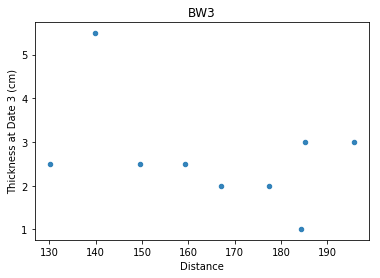

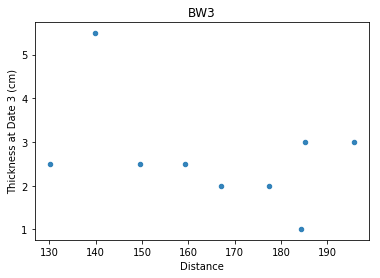

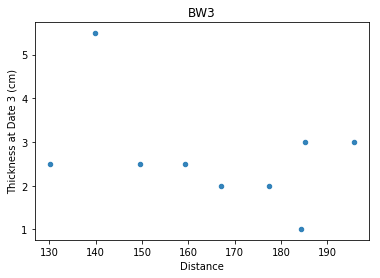

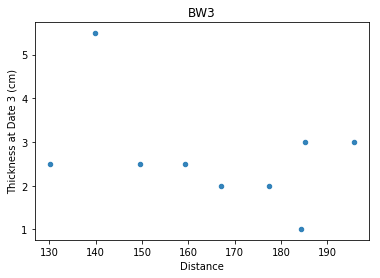

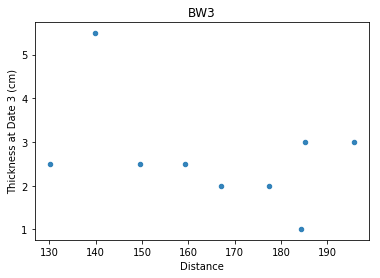

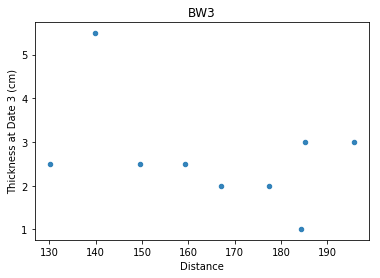

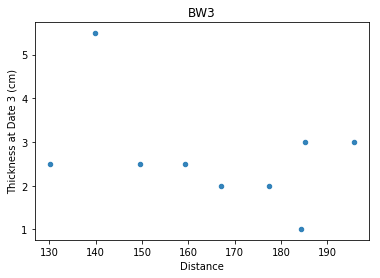

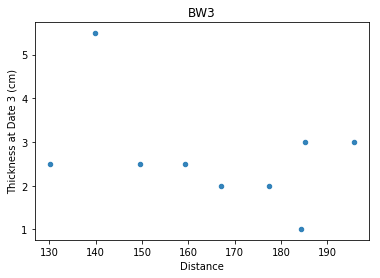

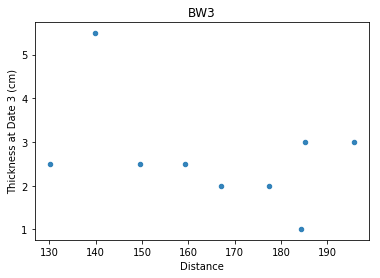

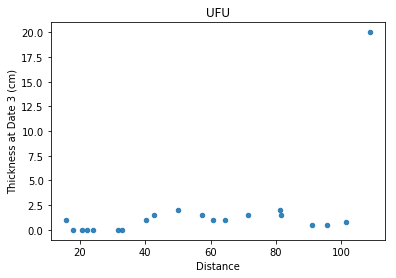

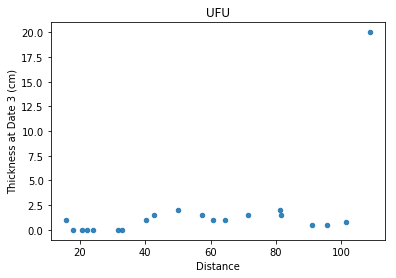

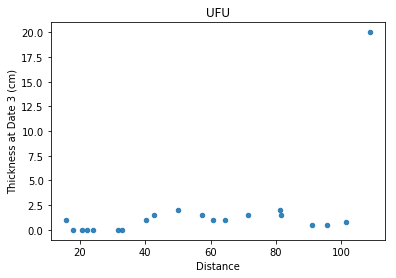

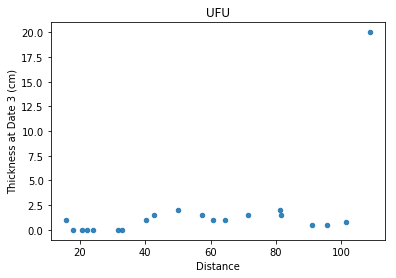

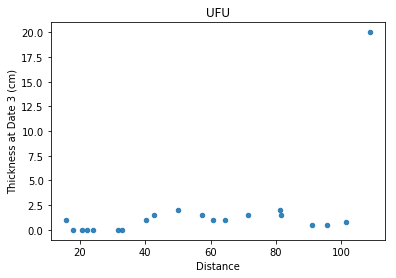

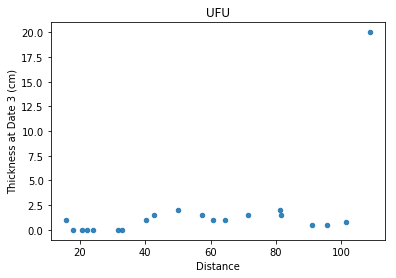

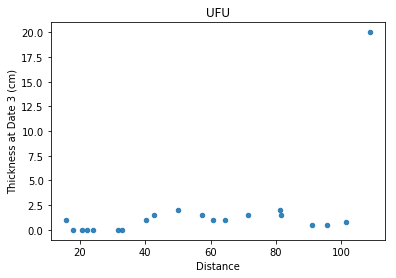

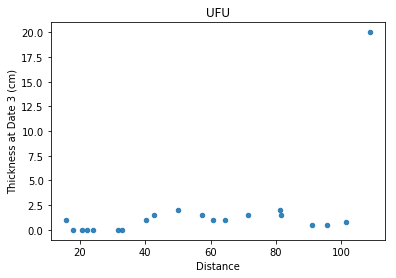

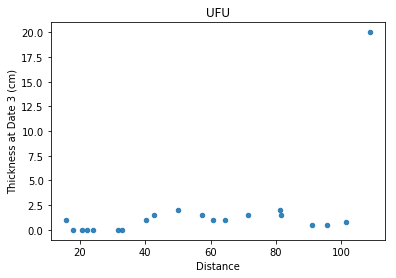

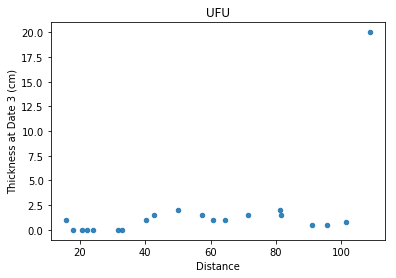

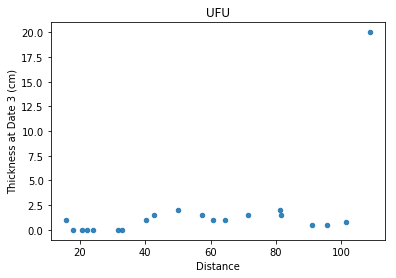

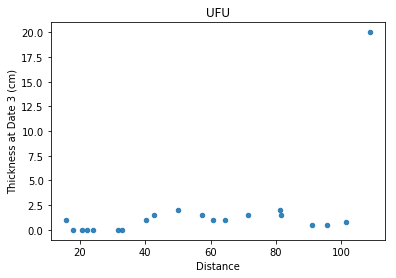

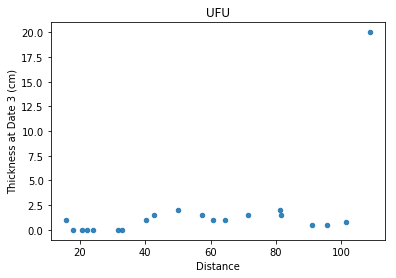

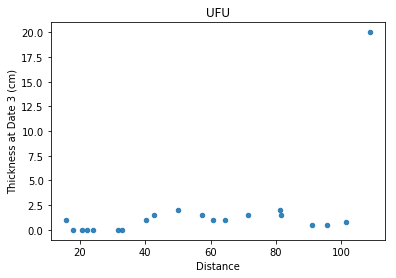

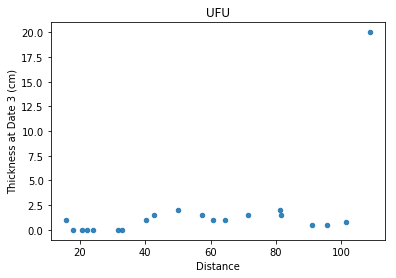

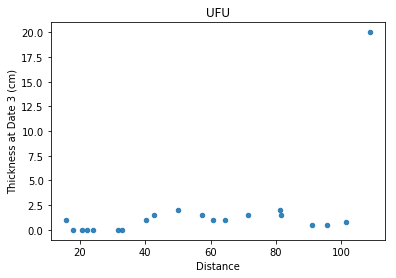

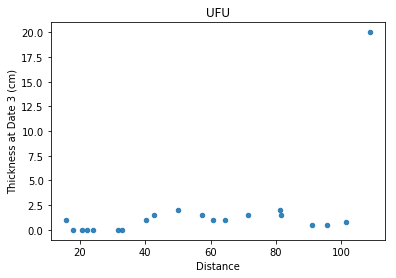

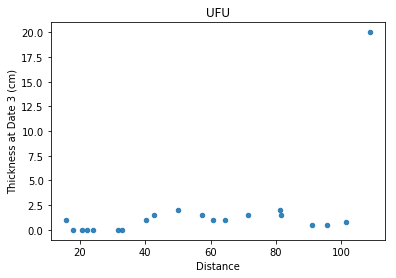

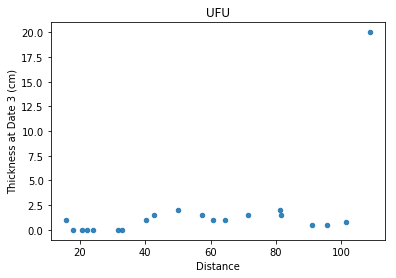

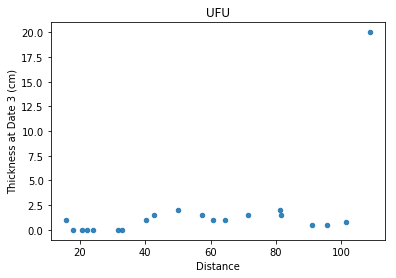

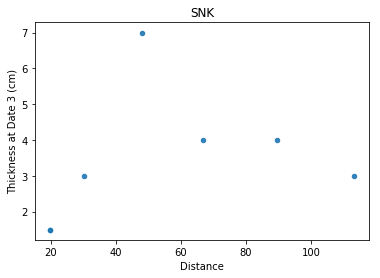

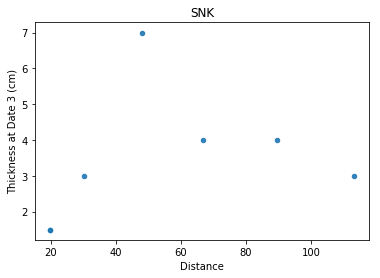

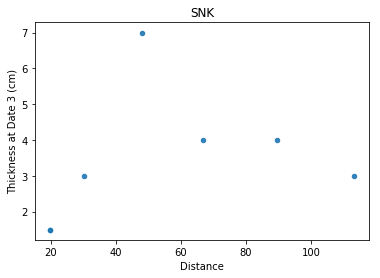

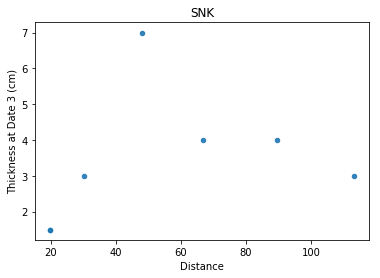

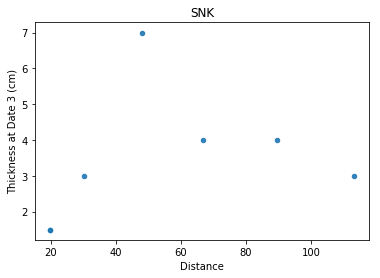

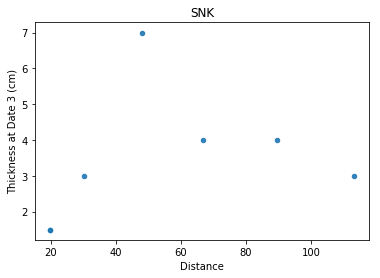

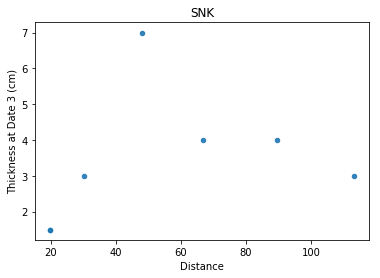

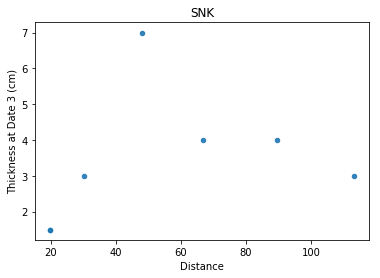

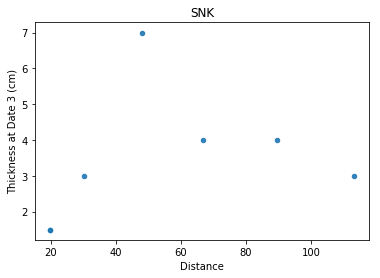

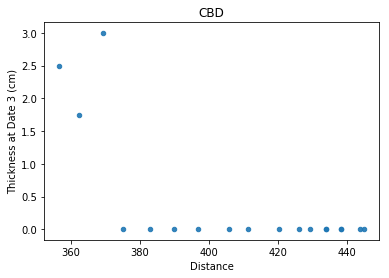

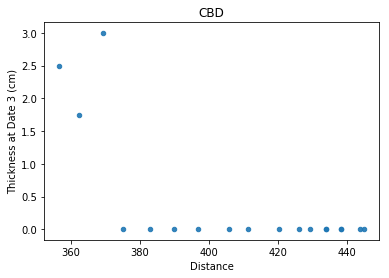

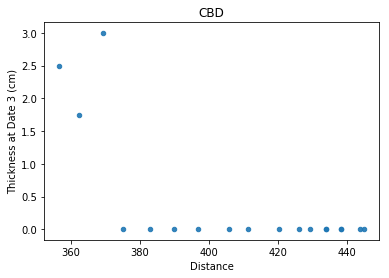

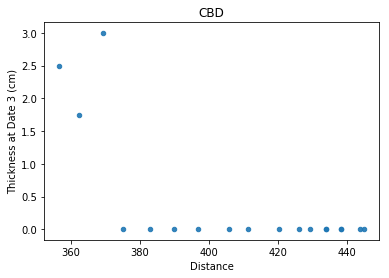

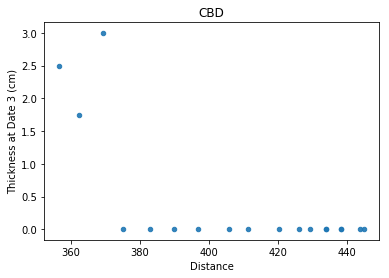

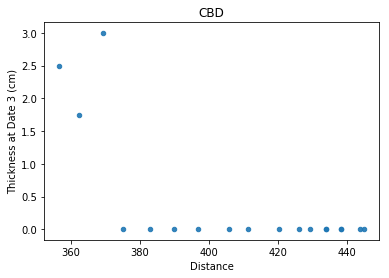

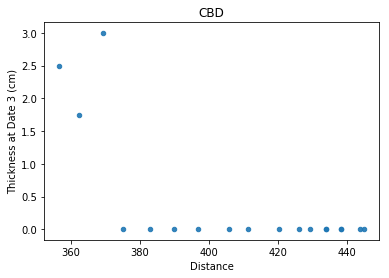

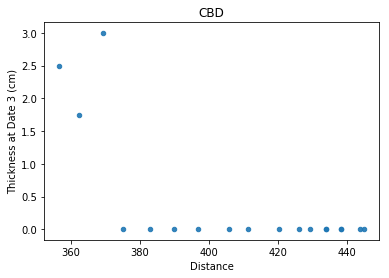

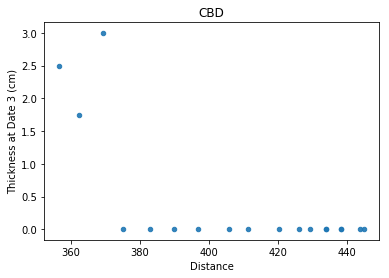

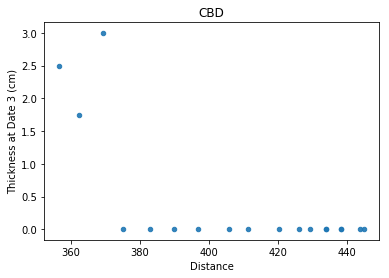

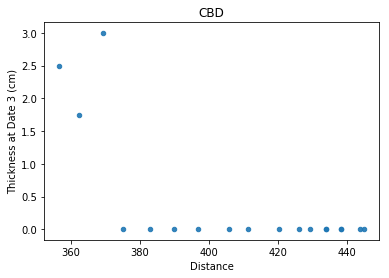

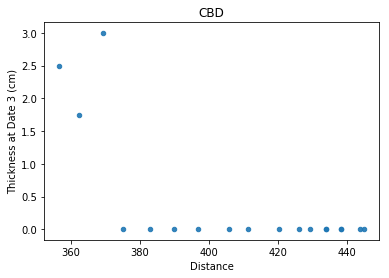

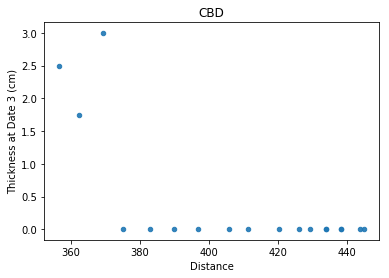

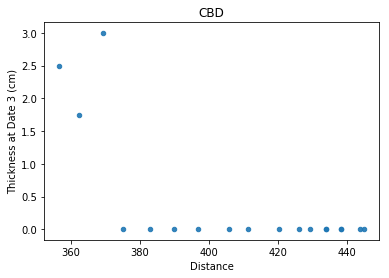

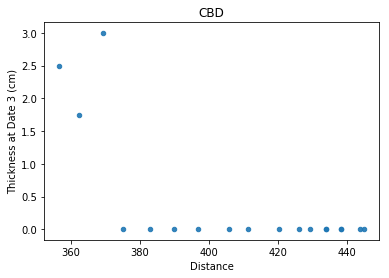

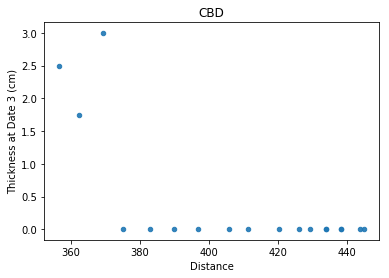

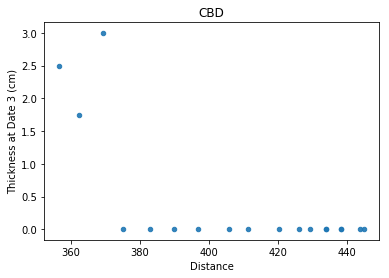

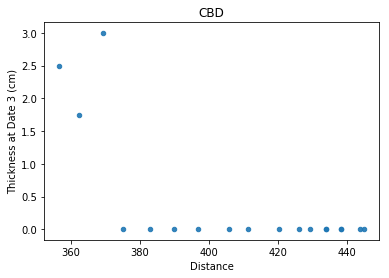

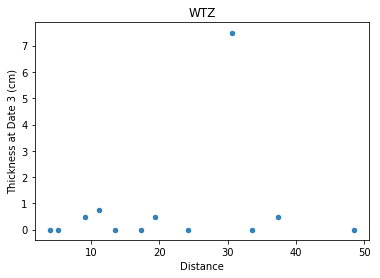

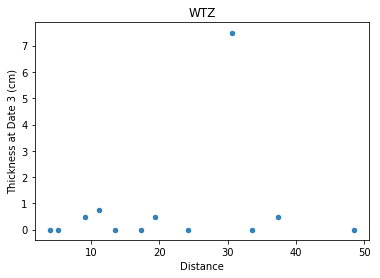

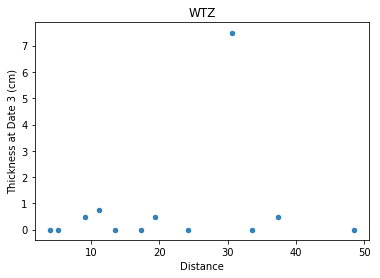

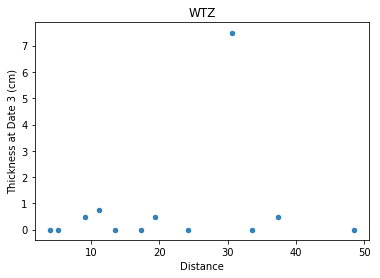

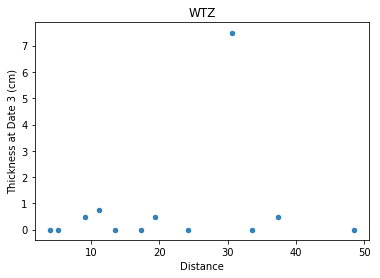

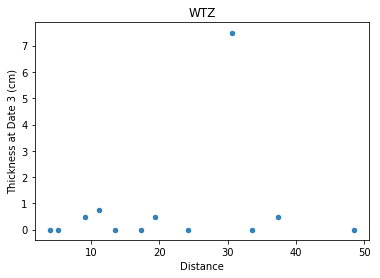

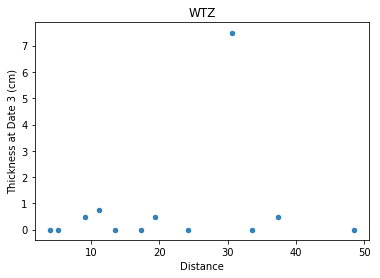

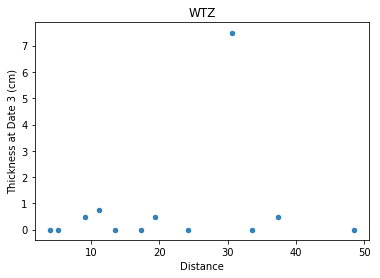

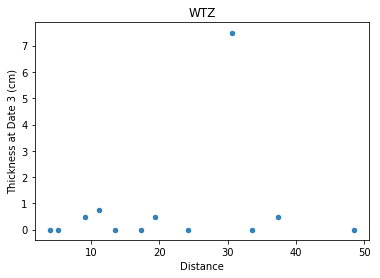

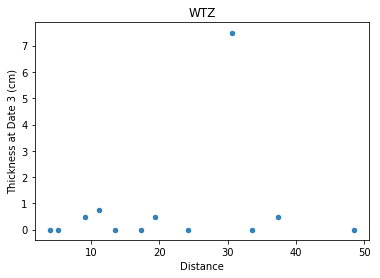

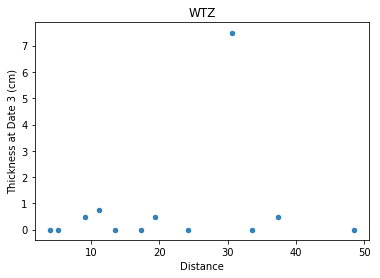

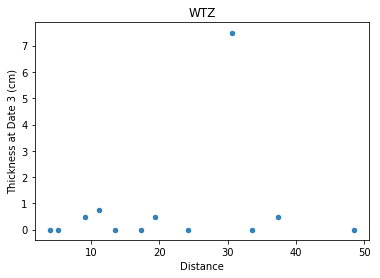

In [108]:
for site in train['Site']:
    s = train.loc[train['Site'] == site]
    s.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
    plt.title(site)
    plt.savefig('{}_Date1vDist.png'.format(site))
    
for site in train['Site']:
    s = train.loc[train['Site'] == site]
    s.plot(kind='scatter', x='Distance', y="Thickness at Date 2 (cm)", alpha=0.9,)
    plt.title(site)
    plt.savefig('{}_Date2vDist.png'.format(site))

        
for site in train['Site']:
    s = train.loc[train['Site'] == site]
    s.plot(kind='scatter', x='Distance', y="Thickness at Date 3 (cm)", alpha=0.9,)
    plt.title(site)
    plt.savefig('{}_Date3vDist.png'.format(site))

,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 12,Distance
115,LFK,WTZ,S1,0.50,1.0,24.64750,-81.65353,24.647714,-81.653949,NaN,48.543182
116,LFK,WTZ,S2,0.50,1.0,24.64760,-81.65360,24.647714,-81.653949,NaN,37.456482
117,LFK,WTZ,S3,0.50,0.0,24.64763,-81.65363,24.647714,-81.653949,NaN,33.544092
118,LFK,WTZ,S4,0.20,0.0,24.64763,-81.65366,24.647714,-81.653949,NaN,30.645362
119,LFK,WTZ,S5,0.00,1.0,24.64765,-81.65372,24.647714,-81.653949,NaN,24.197849
120,LFK,WTZ,S6,0.20,0.5,24.64765,-81.65377,24.647714,-81.653949,NaN,19.427653
121,LFK,WTZ,S7,0.20,0.5,24.64769,-81.65378,24.647714,-81.653949,NaN,17.276171
122,LFK,WTZ,S8,0.20,0.5,24.64768,-81.65382,24.647714,-81.653949,NaN,13.565820
123,LFK,WTZ,S9,0.30,0.2,24.64770,-81.65384,24.647714,-81.653949,NaN,11.118428
124,LFK,WTZ,S10,0.20,0.2,24.64770,-81.65386,24.647714,-81.653949,NaN,9.122672
